In [1]:
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data
Y = iris.target

In [4]:
from sklearn import preprocessing

In [15]:
X_normalized = preprocessing.normalize(X)

In [17]:
encoder = preprocessing.OneHotEncoder().fit(X)
encoder.transform(X).toarray()

array([[ 0.,  1.,  0., ...,  1.,  0.,  0.],
       [ 1.,  0.,  0., ...,  1.,  0.,  0.],
       [ 1.,  0.,  0., ...,  1.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1., ...,  0.,  0.,  1.],
       [ 0.,  0.,  1., ...,  0.,  0.,  1.],
       [ 0.,  1.,  0., ...,  0.,  1.,  0.]])

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model = LogisticRegression(penalty='12',dual=False, tol=0.0001,C=1.0,
                          fit_intercept=True, intercept_scaling=1, class_weight=None,
                          random_state=None, solver='liblinear', max_iter=100, multi_class='ovr',
                          verbose=0, warm_start=False, n_jobs=1)

In [23]:
from sklearn.model_selection import cross_val_score

In [25]:
cross_val_score(model,X,y=None, scoring=None, cv=None,n_jobs=1)

TypeError: cross_val_score() got an unexpected keyword argument 'Y'

In [26]:
from sklearn.model_selection import validation_curve

In [29]:
train_score, test_score = validation_curve(model, X, Y,cv=None, scoring=None, n_jobs=1)

TypeError: validation_curve() missing 2 required positional arguments: 'param_name' and 'param_range'

In [30]:
from __future__ import print_function
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [31]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

In [36]:
print(len(iris_X[:, :]))
print(len(iris_y))

150
150


In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_X, iris_y, test_size=0.3)

In [38]:
print(y_train)

[0 1 2 0 2 1 1 0 1 2 0 0 0 1 2 2 0 1 1 1 1 1 2 2 1 0 0 2 0 2 2 0 1 0 2 0 0
 0 1 2 1 0 2 0 1 1 1 2 0 0 2 2 2 1 0 1 2 1 2 0 1 1 0 0 0 2 0 1 0 1 1 0 0 2
 1 1 0 2 0 2 1 0 2 2 1 1 2 1 2 0 1 2 0 0 1 0 1 2 1 2 2 0 1 1 1]


In [39]:
knn = KNeighborsClassifier()

In [40]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [42]:
print(knn.predict(X_test))
print(y_test)

[2 0 1 0 0 1 1 2 0 1 0 2 1 0 2 2 2 2 0 0 2 2 2 2 1 0 2 2 2 1 0 1 2 0 1 2 0
 0 1 1 0 2 2 1 2]
[2 0 1 0 0 1 1 2 0 1 0 2 2 0 2 2 2 1 0 0 2 2 2 2 1 0 2 2 2 1 0 1 2 0 1 2 0
 0 1 1 0 2 2 1 2]


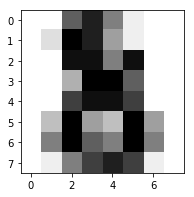

In [44]:
# 源代码: Gaël Varoquaux
# 修改以进行文档化:Jaques Grobler
# 协议: BSD 3 
from sklearn import datasets
import matplotlib.pyplot as plt
#加载数字数据集
digits = datasets.load_digits()
#展示第一个数字
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

TypeError: slice indices must be integers or None or have an __index__ method

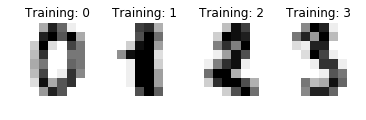

In [47]:
# 作者: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# 协议: BSD 3 clause
# Python标准科学计算包导入
import matplotlib.pyplot as plt
# 导入数据集,分类器和评估度量
from sklearn import datasets, svm, metrics
# 数字数据集
digits = datasets.load_digits()
#数据是一个8x8的数字图像,让我们先看看开头的三张图像.图像存储在数据集
#的`images`属性中,如果我们要加载图像文件的话,可以使用pylab.imread.
#注意每一张图像尺寸必须相等.这些图像各自对应的数字是多少我们是知道的
#他们存储在数据集的target属性中.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
# 在数据上应用一个分类器, 我们需要铺平图像,
# 将数据转换成二位矩阵:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
# 创建一个分类器: 一个支持向量分类器
classifier = svm.SVC(gamma=0.001)
# 我们在前半部分数据上进行学习
classifier.fit(data[:n_samples / 2], digits.target[:n_samples / 2])
# 现在预测后半部分的值:
expected = digits.target[n_samples / 2:]
predicted = classifier.predict(data[n_samples / 2:])
print("Classification report for classifier %s:\n%s\n"
  % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))
images_and_predictions = list(zip(digits.images[n_samples / 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)
    plt.show()

Coefficients: 
 [ 938.23786125]
Residual sum of squares: 2548.07
Variance score: 0.47


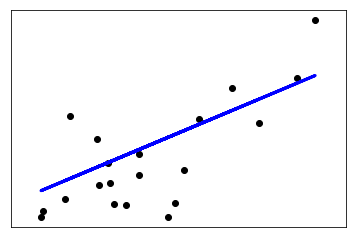

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

diabetes = datasets.load_diabetes()
diabetes_X = diabetes.data[:,np.newaxis,2]
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train) #这里就是在训练模型了

print('Coefficients: \n', regr.coef_) #这就是w0，常数项
print("Residual sum of squares: %.2f" % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2)) #这个是预测与真实的差
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test)) #这里就是得分，1为拟合最好，0最差

plt.scatter(diabetes_X_test, diabetes_y_test, color = 'black')
plt.plot(diabetes_X_test,regr.predict(diabetes_X_test), color='blue',linewidth=3)
plt.xticks(())
plt.yticks(())

plt.show()

[ 30.00821269  25.0298606   30.5702317   28.60814055]
[ 24.   21.6  34.7  33.4]


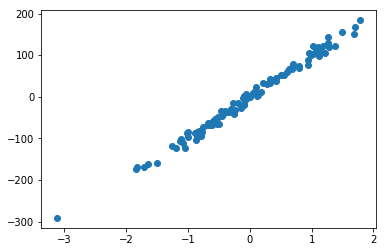

In [51]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

#使用以后的数据集进行线性回归
loaded_data=datasets.load_boston()
data_X=loaded_data.data
data_y=loaded_data.target

model=LinearRegression()
model.fit(data_X,data_y)

print(model.predict(data_X[:4,:]))
print(data_y[:4])

#使用生成线性回归的数据集，最后的数据集结果用散点图表示
X,y=datasets.make_regression(n_samples=100,n_features=1,n_targets=1,noise=10)   #n_samples表示样本数目，n_features特征的数目  n_tragets  noise噪音
plt.scatter(X,y)
plt.show()

In [52]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

#使用以后的数据集进行线性回归
loaded_data=datasets.load_boston()
data_X=loaded_data.data
data_y=loaded_data.target

model=LinearRegression()
model.fit(data_X,data_y)

print(model.predict(data_X[:4,:]))
print(data_y[:4])

#参数
print(model.coef_)      #如果y=0.1x+0.3   则此行输出的结果为0.1
print(model.intercept_)             #此行输出的结果为0.3
print(model.get_params())       #模型定义时定义的参数，如果没有定义则返回默认值
print(model.score(data_X,data_y))   #给训练模型打分，注意用在LinearR中使用R^2 conefficient of determination打分

[ 30.00821269  25.0298606   30.5702317   28.60814055]
[ 24.   21.6  34.7  33.4]
[ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01]
36.4911032804
{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}
0.740607742865


0.933333333333


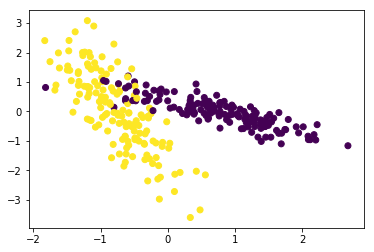

In [54]:
from sklearn import preprocessing #进行标准化数据时，需要引入个包
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.datasets.samples_generator import  make_classification
from sklearn.svm import SVC
import matplotlib.pyplot as plt


X,y=make_classification(n_samples=300,n_features=2,n_redundant=0,n_informative=2,random_state=22,n_clusters_per_class=1,scale=100)

#X=preprocessing.minmax_scale(X,feature_range=(-1,1))
X=preprocessing.scale(X)   #0.966666666667 没有 0.477777777778
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
clf=SVC()
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))


plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

a=np.array([[10,2.7,3.6],
            [-100,5,-2],
            [120,20,40]],dtype=np.float64)   #每一列代表一个属性
#print(a)　　　　　　　#标准化之前a　　　　　
#print(preprocessing.scale(a))　#标准化之后的a　

In [55]:
print(a)

[[  10.     2.7    3.6]
 [-100.     5.    -2. ]
 [ 120.    20.    40. ]]


In [57]:
print(preprocessing.scale(a))

[[ 0.         -0.85170713 -0.55138018]
 [-1.22474487 -0.55187146 -0.852133  ]
 [ 1.22474487  1.40357859  1.40351318]]


In [73]:
from sklearn import svm
from sklearn import datasets

clf=svm.SVC()
iris=datasets.load_iris()
iris_X,iris_y=iris.data,iris.target

X_train, X_test, y_train, y_test = train_test_split(
    iris_X, iris_y, test_size=0.3)

#print(X_train)
#print(y_train)
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [76]:
from sklearn.externals import joblib
#save
joblib.dump(clf,'clf.pkl')
clf3=joblib.load('clf.pkl')
result = clf3.predict(X_test)
print(clf3.predict(X_test))
print(y_test)

[0 2 0 0 2 2 2 2 0 0 0 1 0 1 1 2 0 2 0 0 2 1 1 2 1 2 0 1 0 1 1 0 1 2 0 2 2
 1 0 0 0 2 0 1 1]
[0 2 0 0 2 2 2 2 0 0 0 1 0 1 1 2 0 2 0 0 2 1 1 2 1 2 0 1 0 1 1 0 1 2 0 1 2
 1 0 0 0 2 0 1 1]


NameError: name 'cmp' is not defined